In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/winequality.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
# check for null values
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [ ]:
df['fixed acidity'].fillna((df['fixed acidity'].mean()), inplace=True)
df['volatile acidity'].fillna((df['volatile acidity'].mean()), inplace=True)
df['citric acid'].fillna((df['citric acid'].mean()), inplace=True)
df['residual sugar'].fillna((df['residual sugar'].mean()), inplace=True)
df['chlorides'].fillna((df['chlorides'].mean()), inplace=True)
df['pH'].fillna((df['pH'].mean()), inplace=True)
df['sulphates'].fillna((df['sulphates'].mean()), inplace=True)

In [ ]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
# Encoding the target variable
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['type']= label_encoder.fit_transform(df.type)
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5


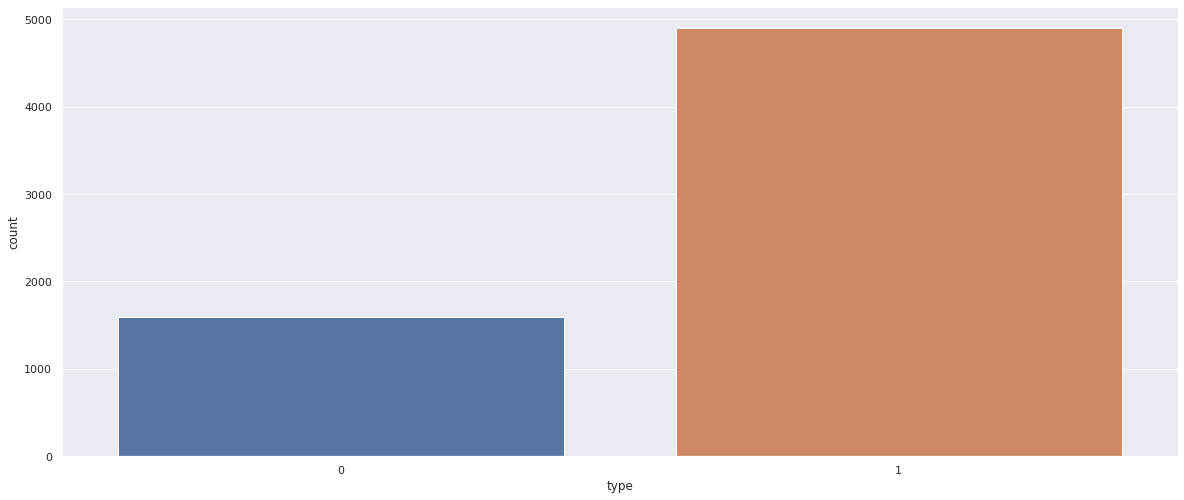

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(20,8.27)})
sns.countplot(x ='type', data = df)
plt.show()

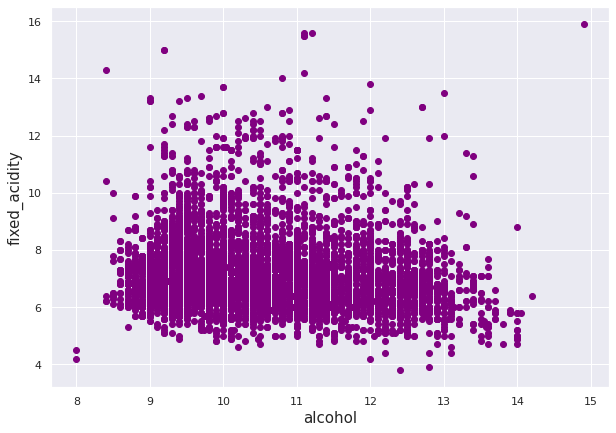

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.scatter(x="alcohol",y="fixed acidity",data =df,marker= 'o',color='purple')
plt.xlabel("alcohol",fontsize=15)
plt.ylabel("fixed_acidity",fontsize=15)
plt.show()

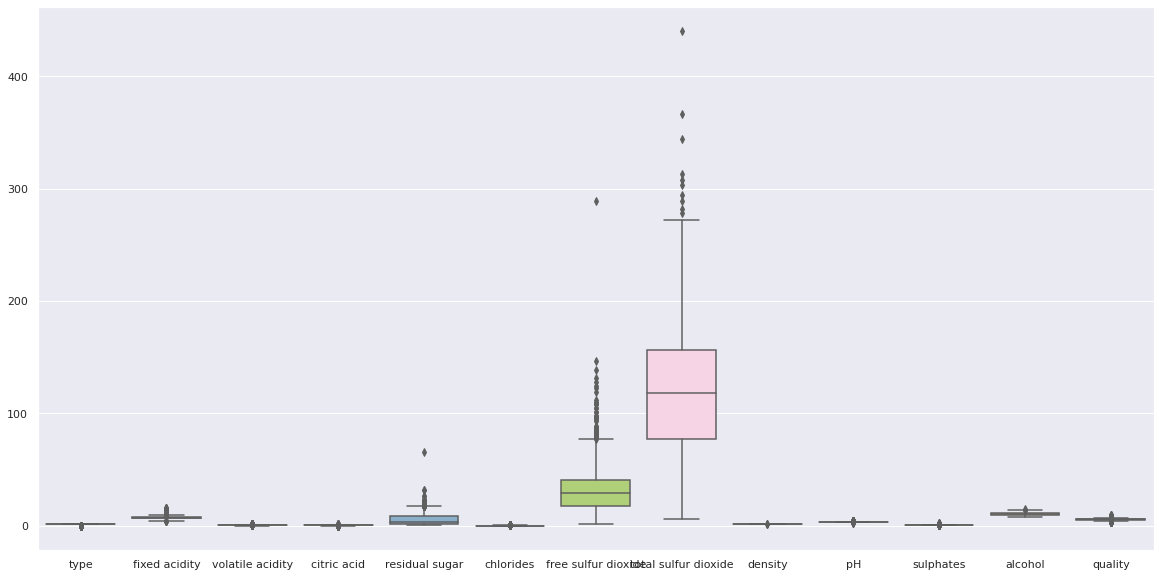

In [ ]:
import seaborn as sns
sns.set()
plt.figure(figsize=(20,10))
sns.boxplot(data=df,palette="Set3")
plt.show()

In [ ]:
from scipy import stats
z=np.abs(stats.zscore(df))
print(np.where(z>3))

(array([   0,    7,   40,   41,  182,  191,  194,  195,  196,  207,  250,
        251,  253,  292,  294,  325,  325,  372,  395,  405,  444,  445,
        484,  531,  600,  659,  683,  687,  729,  740,  745,  774,  820,
        827,  830,  834,  859,  873,  876,  946, 1034, 1034, 1051, 1158,
       1163, 1217, 1229, 1250, 1255, 1257, 1272, 1369, 1385, 1417, 1417,
       1454, 1476, 1484, 1526, 1551, 1598, 1599, 1605, 1608, 1638, 1653,
       1653, 1663, 1663, 1681, 1688, 1688, 1722, 1775, 1835, 1842, 1856,
       1865, 1900, 1925, 1926, 1931, 1931, 1931, 1951, 2024, 2026, 2036,
       2050, 2050, 2127, 2154, 2186, 2186, 2321, 2334, 2336, 2349, 2373,
       2403, 2441, 2465, 2466, 2489, 2492, 2575, 2620, 2625, 2654, 2668,
       2704, 2705, 2711, 2728, 2735, 2748, 2750, 2771, 2781, 2781, 2781,
       2785, 2787, 2820, 2849, 2872, 2874, 2893, 2964, 3014, 3023, 3025,
       3043, 3050, 3064, 3066, 3072, 3087, 3152, 3152, 3265, 3283, 3288,
       3307, 3307, 3379, 3387, 3409, 3420, 3461, 3

In [ ]:
df1=df[(z<3).all(axis=1)]
print(df.shape)
print(df1.shape)

(6497, 13)
(5989, 13)


In [ ]:
df1.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [ ]:
df.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [ ]:
quality_mapping = { 3 : "Low",4 : "Low",5: "Medium",6 : "Medium",7: "Medium",8 : "High",9 : "High"}
df["quality"] =  df["quality"].map(quality_mapping)

In [ ]:
df.quality.value_counts()

Medium    6053
Low        246
High       198
Name: quality, dtype: int64

In [ ]:
mapping_quality = {"Low" : 0,"Medium": 1,"High" : 2}
df["quality"] =  df["quality"].map(mapping_quality)

In [ ]:
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,1
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,1
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,1
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,1
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,1
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,1
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,1
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,1


In [ ]:
x = df.drop("quality",axis=True)
y = df["quality"]

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [ ]:
print(model.feature_importances_)

[0.00810157 0.08586066 0.10785006 0.08318634 0.08653129 0.08408291
 0.10627907 0.08708904 0.08442558 0.08320519 0.08864217 0.09474612]


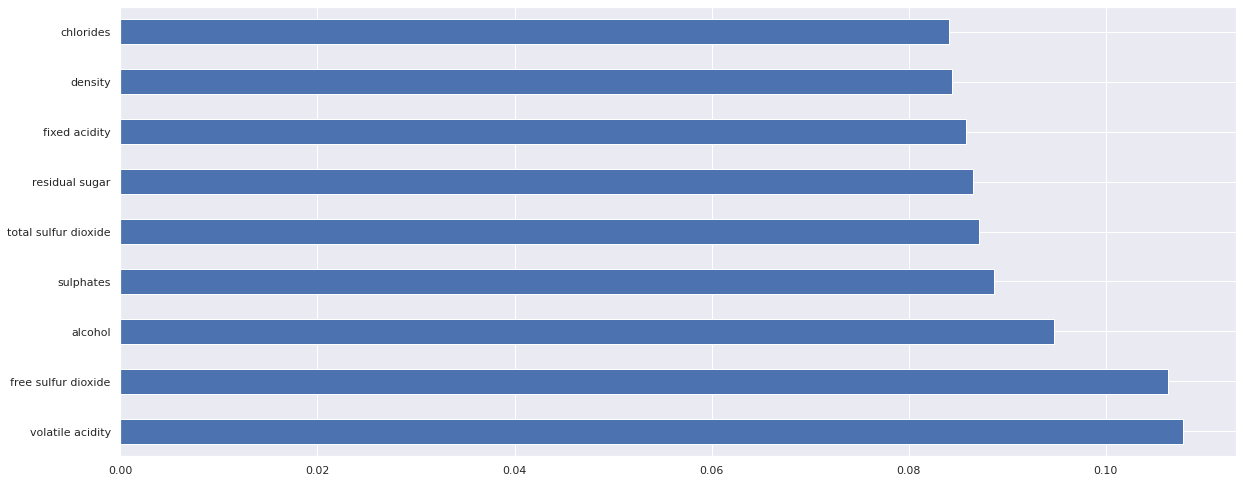

In [ ]:
feat_importances = pd.Series(model.feature_importances_,index =x.columns)
feat_importances.nlargest(9).plot(kind="barh")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# ***MODEL_1[LOGISTIC REGRESSION]***

In [ ]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression(random_state=0)
model1.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred1=model1.predict(x_test)
y_pred1

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
model1.score(x_train,y_train)

0.9326765188834154

In [ ]:
b=model1.score(x_test,y_test)
b

0.931076923076923

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred1)
print(cm)
accuracy_score(y_test,y_pred1)

[[   3   63    0]
 [   1 1510    1]
 [   0   47    0]]


0.931076923076923

# ***MODEL_2 [SVC]***

In [ ]:
from sklearn.svm import SVC
model2=SVC(kernel='linear',random_state=0) 
model2.fit(x_train,y_train)  

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred2=model2.predict(x_test)
y_pred2

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
model2.score(x_train,y_train)

0.9320607553366174

In [ ]:
c=model2.score(x_test,y_test)
c

0.9304615384615385

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred2)
print(cm)
accuracy_score(y_test,y_pred2)

[[   0   66    0]
 [   0 1512    0]
 [   0   47    0]]


0.9304615384615385

# ***MODEL_3 [Decision Tree]***

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model3=DecisionTreeClassifier(random_state=0)
model3.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
y_pred3=model3.predict(x_test)
y_pred3

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
model3.score(x_train,y_train)

1.0

In [ ]:
d=model3.score(x_test,y_test)
d

0.8793846153846154

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred3)
print(cm)
accuracy_score(y_test,y_pred3)

[[  18   47    1]
 [  78 1392   42]
 [   0   28   19]]


0.8793846153846154

[Text(0.758326358892224, 0.9833333333333333, 'x[11] <= 1.513\ngini = 0.129\nsamples = 4872\nvalue = [180, 4541, 151]'),
 Text(0.6000331681120498, 0.95, 'x[2] <= 3.142\ngini = 0.113\nsamples = 4373\nvalue = [175, 4113, 85]'),
 Text(0.40015280976652146, 0.9166666666666666, 'x[6] <= 5.845\ngini = 0.107\nsamples = 4315\nvalue = [157, 4073, 85]'),
 Text(0.39589565075498057, 0.8833333333333333, 'x[6] <= -0.894\ngini = 0.106\nsamples = 4312\nvalue = [154, 4073, 85]'),
 Text(0.17490936907573087, 0.85, 'x[0] <= -0.586\ngini = 0.182\nsamples = 868\nvalue = [77, 781, 10]'),
 Text(0.07450028270196561, 0.8166666666666667, 'x[4] <= 1.374\ngini = 0.098\nsamples = 564\nvalue = [24, 535, 5]'),
 Text(0.07024312369042472, 0.7833333333333333, 'x[10] <= -1.014\ngini = 0.095\nsamples = 563\nvalue = [23, 535, 5]'),
 Text(0.06598596467888383, 0.75, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.07450028270196561, 0.75, 'x[2] <= 2.481\ngini = 0.092\nsamples = 562\nvalue = [22, 535, 5]'),
 Text(0.034057

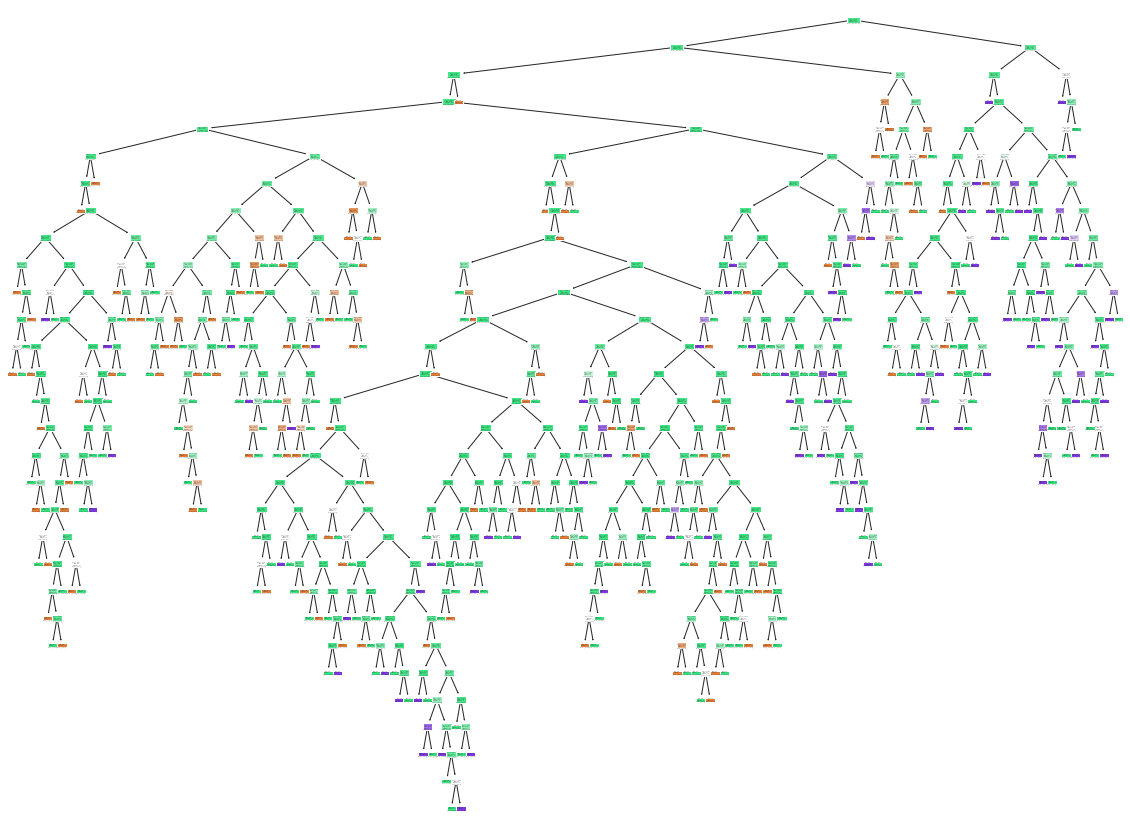

In [ ]:
from sklearn import tree
plt.figure(figsize=(20,15))
tree.plot_tree(model3,filled=True)

In [ ]:
print(tree.export_text(model3))

|--- feature_11 <= 1.51
|   |--- feature_2 <= 3.14
|   |   |--- feature_6 <= 5.85
|   |   |   |--- feature_6 <= -0.89
|   |   |   |   |--- feature_0 <= -0.59
|   |   |   |   |   |--- feature_4 <= 1.37
|   |   |   |   |   |   |--- feature_10 <= -1.01
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_10 >  -1.01
|   |   |   |   |   |   |   |--- feature_2 <= 2.48
|   |   |   |   |   |   |   |   |--- feature_11 <= -1.20
|   |   |   |   |   |   |   |   |   |--- feature_10 <= -0.11
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_10 >  -0.11
|   |   |   |   |   |   |   |   |   |   |--- feature_7 <= -1.24
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- feature_7 >  -1.24
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_11 >  -1.20
|   |   |   |   |   |   |   |   |   |--- feature_9 <= -

# ***MODEL_4 [Random Forest]***

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model4=RandomForestClassifier(random_state=0)
model4.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
y_pred4=model4.predict(x_test)
y_pred4

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
model4.score(x_train,y_train)

1.0

In [ ]:
e=model4.score(x_test,y_test)
e

0.9415384615384615

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred4)
print(cm)
accuracy_score(y_test,y_pred4)

[[   6   60    0]
 [   1 1510    1]
 [   0   33   14]]


0.9415384615384615

# ***MODEL_5 [KNN]***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model5=KNeighborsClassifier()
model5.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred5=model5.predict(x_test)
y_pred5

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
model5.score(x_train,y_train)

0.9406814449917899

In [ ]:
f=model5.score(x_test,y_test)
f

0.931076923076923

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred5)
print(cm)
accuracy_score(y_test,y_pred5)

[[   3   63    0]
 [   4 1505    3]
 [   0   42    5]]


0.931076923076923

In [ ]:
Testscores = pd.Series([b,c,d,e,f], 
                        index=['Logistic Regression','Support Vector Machine','Decision Tree','Random Forest','K-Nearest Neighbour']) 
print(Testscores)

Logistic Regression       0.931077
Support Vector Machine    0.930462
Decision Tree             0.879385
Random Forest             0.941538
K-Nearest Neighbour       0.931077
dtype: float64


# ***ACCURACY OF MODELS***

Text(0.5, 1.0, 'Regression Model Scores')

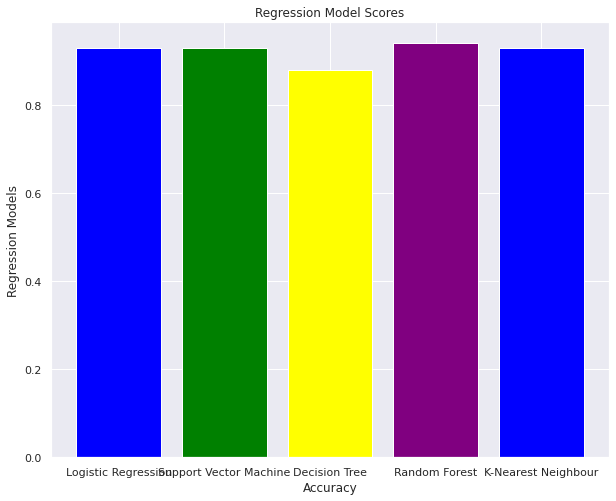

In [ ]:
model=['Logistic Regression','Support Vector Machine','Decision Tree','Random Forest','K-Nearest Neighbour']
accuracy=[b,c,d,e,f]
plt.figure(figsize=(10,8))
col = ['blue','green','yellow','purple','blue','orange']
plt.bar(model,accuracy,align='center',color=col)
plt.xlabel("Accuracy")
plt.ylabel("Regression Models")
plt.title("Regression Model Scores")

In [ ]:
import plotly.graph_objs as go
accuracy=[b,c,d,e,f]
colors = ['green','yellow','purple','blue','orange']
fig=go.Figure([go.Bar(x=model,y=accuracy)])
fig.show()

In [ ]:
import pickle
with open('wine_quality.pkl','wb') as f:
    pickle.dump(model4,f)

In [ ]:
rf_model=pickle.load(open('wine_quality.pkl','rb'))
wine_quality=rf_model.predict([[1,	6.0,	0.310,	0.47,	3.6,	0.067,	18.0,	42.0,	0.99549,	3.39,	0.660000,	11.0]])[0]
if wine_quality==0:
  print("low")
elif wine_quality==1:
  print("medium")
else:
  print("high")

low
